In [49]:
%matplotlib inline

import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import scipy.stats

In [ ]:
feats = np.load('/scratch/groups/jlg/texpca/pool2_features_histmatch.npy').item()
fm = feats['pool2_features'].T
pca = PCA(n_components=20)
x = pca.fit_transform(fm)
x.shape

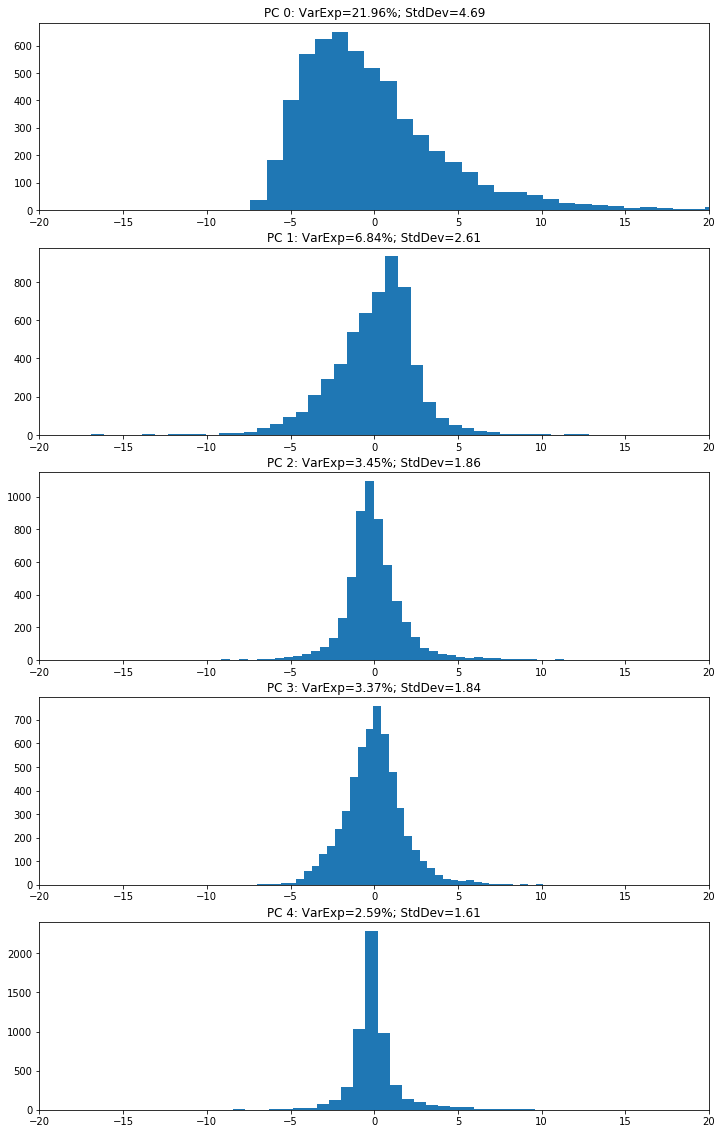

In [37]:
## Plot histograms showing variance across each PC

fig = plt.figure(figsize=(12,20))

for i in range(5):
    plt.subplot(5,1,i+1);
    plt.hist(x[:,i],bins=50);
    plt.xlim([-20, 20])
    std = np.std(x[:,i]); mn = np.mean(x[:,i])
    plt.title('PC {0}: VarExp={1:.2f}%; StdDev={2:.2f}'.format(i, pca.explained_variance_[i], std))

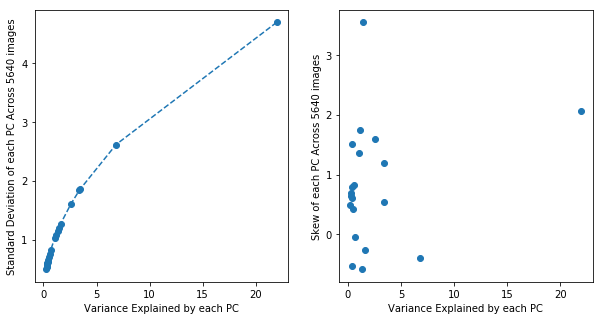

In [56]:
std = np.std(x,axis=0)
skew = scipy.stats.skew(x, axis=0)

fig = plt.figure(figsize=(10,5))

plt.subplot(1,2,1);
plt.plot(pca.explained_variance_, std, 'o--')
plt.ylabel('Standard Deviation of each PC Across {} images'.format(x.shape[0]))
plt.xlabel('Variance Explained by each PC')

plt.subplot(1,2,2);
plt.plot(pca.explained_variance_, skew, 'o')
plt.ylabel('Skew of each PC Across {} images'.format(x.shape[0]))
plt.xlabel('Variance Explained by each PC')
